## Astronomical Object Classification and Regression

In this project we study the classification of astronomical objects based on their physical (photometric) properties. Especially, we will consider the following three problems:

1. Classification of galaxies, quasars and stars based on photometric measurements.

2. Binary classification of galaxies and quasars based on photometric measurements.

3. Redshift determination (regression) of galaxies and quasars based on photometric measurements (photometric redshift).

The classification and regression are done using simple neural networks. 

The motivation for this work comes from the fact that nowadays the amount of astronomical data increases extremely rapidly. There can be millions of measurements and photos taken each night. The astronomers then need to identify the astronomical objects based on their images and/or photometric and spectroscopic measurements. Since the amount of data is huge this classification can not be done effectively by the professional astronomers or crowd-sourced projects alone. Machine learning and neural networks provide a promising method to do the classification reliably and quickly even on large datasets.

Our networks distinguish stars, galaxies and quasars from each other with 88,4 % accuracy and galaxies and quasars with 94,6 % accuracy in the test data. Our regression network predicts the redshift of galaxies and quasars with mean absolute error of 0.17 in the test data. Hence our networks provide a way to identify galaxies and quasars with high accuracy and also give a reasonable estimate for their redshift only using photometric measurements.

Data is downloaded from Kaggle: https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). 
This data is from the data release 17 in 2022 (https://www.sdss4.org/dr17/).
Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar (quasar is a galaxy having an active nucleus due to an active supermassive black hole).

Data is clean, i.e. it does not contain any missing values or NaN values.

The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 
2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. The project began in 2000.

The original task was to classify an object using all measurements in the dataset (i.e. photometric measurements + redshift + coordinates in the sky). We will restrict to only photometric measurements.


#### The data contains the following 18 columns:
##### - obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
##### - alpha = Right Ascension angle (at J2000 epoch)
##### - delta = Declination angle (at J2000 epoch)
##### - u = Ultraviolet filter in the photometric system
##### - g = Green filter in the photometric system
##### - r = Red filter in the photometric system
##### - i = Near Infrared filter in the photometric system
##### - z = Infrared filter in the photometric system
##### - run_ID = Run Number used to identify the specific scan
##### - rerun_ID = Rerun Number to specify how the image was processed
##### - cam_col = Camera column to identify the scanline within the run
##### - field_ID = Field number to identify each field
##### - spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
##### - class = object class (galaxy, star or quasar object)
##### - redshift = redshift value based on the increase in wavelength
##### - plate = plate ID, identifies each plate in SDSS
##### - MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
##### - fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [23]:
import pandas as pd

df = pd.read_csv("star_classification.csv")

# Let's drop irrelevant ID features and date.
df.drop(["obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "spec_obj_ID", "plate", "MJD", "fiber_ID"], inplace = True, axis = 1)

# Let's rename the columns with the above explanations.
df.rename(columns={"alpha": "right ascension", "delta": "declination", "u": "ultraviolet", "g": "green", "r": "red",
                  "i": "near infrared", "z": "infrared"}, inplace = True)
df


,right ascension,declination,ultraviolet,green,red,near infrared,infrared,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040


##### So we are left with the following information:
##### - Right Ascension, the angular distance of a particular point measured eastward along the celestial equator from the Sun at the March equinox. Celestial equator is the projection of Earth's equator in the outer space (celestial sphere).
##### - Declination angle, the declination angle is measured north (positive) or south (negative) of the celestial equator.
##### - Ultraviolet filter in the photometric system
##### - Green filter in the photometric system
##### - Red filter in the photometric system
##### - Near Infrared filter in the photometric system
##### - Infrared filter in the photometric system
##### - Object class (galaxy, star or quasar object)
##### - Redshift value based on the increase in wavelength.

Right ascension and declination angle are just spherical coordinates of an object in the sky with respect to the celestial equator.

Here photometric system is a set of well-defined passbands (the range of frequencies or wavelengths that can pass through a filter).
We will use only photometric measurements in the classification and regression tasks, i.e. we only use ultraviolet, green, red, near infrared and infrared filter data.

Photometry studies the brightness of the object when it is viewed through various standard filters, each of which lets through a relatively broad passband of colours, such as red light, green light, blue light etc.

For galaxies the redshift is due to the expansion of space and for stars it usually is caused by the radial motion with respect to us (most of the stars we see are in our own galaxy). Positive redshift = object moves away from us and negative redshift = object moves towards us (= blueshift).

In [24]:
# Find the observations for stars, quasars and galaxies.
df_stars = df[df["class"] == "STAR"]
df_quasars = df[df["class"] == "QSO"] # QSO = Quasi-Stellar Object = Quasar = Active galaxy
df_galaxies = df[df["class"] == "GALAXY"]
print(f"Stars: {len(df_stars)}, Quasars : {len(df_quasars)}, Galaxies: {len(df_galaxies)}")

Stars: 21594, Quasars : 18961, Galaxies: 59445


The ordinary goal was to classify an object using ALL measurements. However we only use the photometric measurements here, because:

1. In this dataset stars, galaxies and quasars have almost identical distribution in the sky since the data is from a survey
(a redshift survey is a survey of a section of the sky to measure the redshift of astronomical objects, usually galaxies).
For this reason we drop the spherical coordinates right ascension and declination from the training and testing data.

2. Redshift roughly tells us how far an object is in outer space (or how the object moves with respect to us). 
Therefore redshift is "too much" information here since we can immediately identify stars with it and also make distinction 
between ordinary galaxies and quasars since most of the quasars are much further away and have greater redshifts. 
In addition, spectroscopy as a measurement is considerably more difficult than simple photometry, which measures the brightness 
of astronomical objects through certain filters (in spectroscopy one has to find and identify the absorption/emission lines of an object).
Also telescope time is limited in research use so sometimes there is not enough time to determine the redshift for each object.

In [25]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder

# The target value will be class. So there are three classes, i.e. star, quasar or galaxy. Let's convert the class into an integer.
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['class']) # 0 = GALAXY, 1 = QSO, 2 = STAR

# Another option would be to use one-hot encoding.
# y = np.array(pd.get_dummies(dataframe["class"], dtype = int))

# We use only the photometric measurements (see the explanation from above).
X = df.drop(["class", "redshift", "right ascension", "declination"], axis = 1)
X

,ultraviolet,green,red,near infrared,infrared
0,23.87882,22.27530,20.39501,19.16573,18.79371
1,24.77759,22.83188,22.58444,21.16812,21.61427
2,25.26307,22.66389,20.60976,19.34857,18.94827
3,22.13682,23.77656,21.61162,20.50454,19.25010
4,19.43718,17.58028,16.49747,15.97711,15.54461
...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569
99996,22.69118,22.38628,20.45003,19.75759,19.41526
99997,21.16916,19.26997,18.20428,17.69034,17.35221
99998,25.35039,21.63757,19.91386,19.07254,18.62482


Let's plot a few figures. In the first figure we can see that redshift and infrared filter clearly distinct all classes.
Here redshift can be roughly identified with the distance to the galaxy. For stars, redshift describes the velocity of the star
in the radial direction with respect to us. For distant galaxies, redshift can no longer be interpreted as velocity. The expansion
of space increases the wavelength of a photon when it is emitted from the galaxy and reaches our instruments.

Infrared filter roughly means the "redness" of the object. Distant galaxies look more red since the light emitted from the 
galaxy gets stretched to the red side of the spectrum (all the way to the infrared) due to the expansion of space.

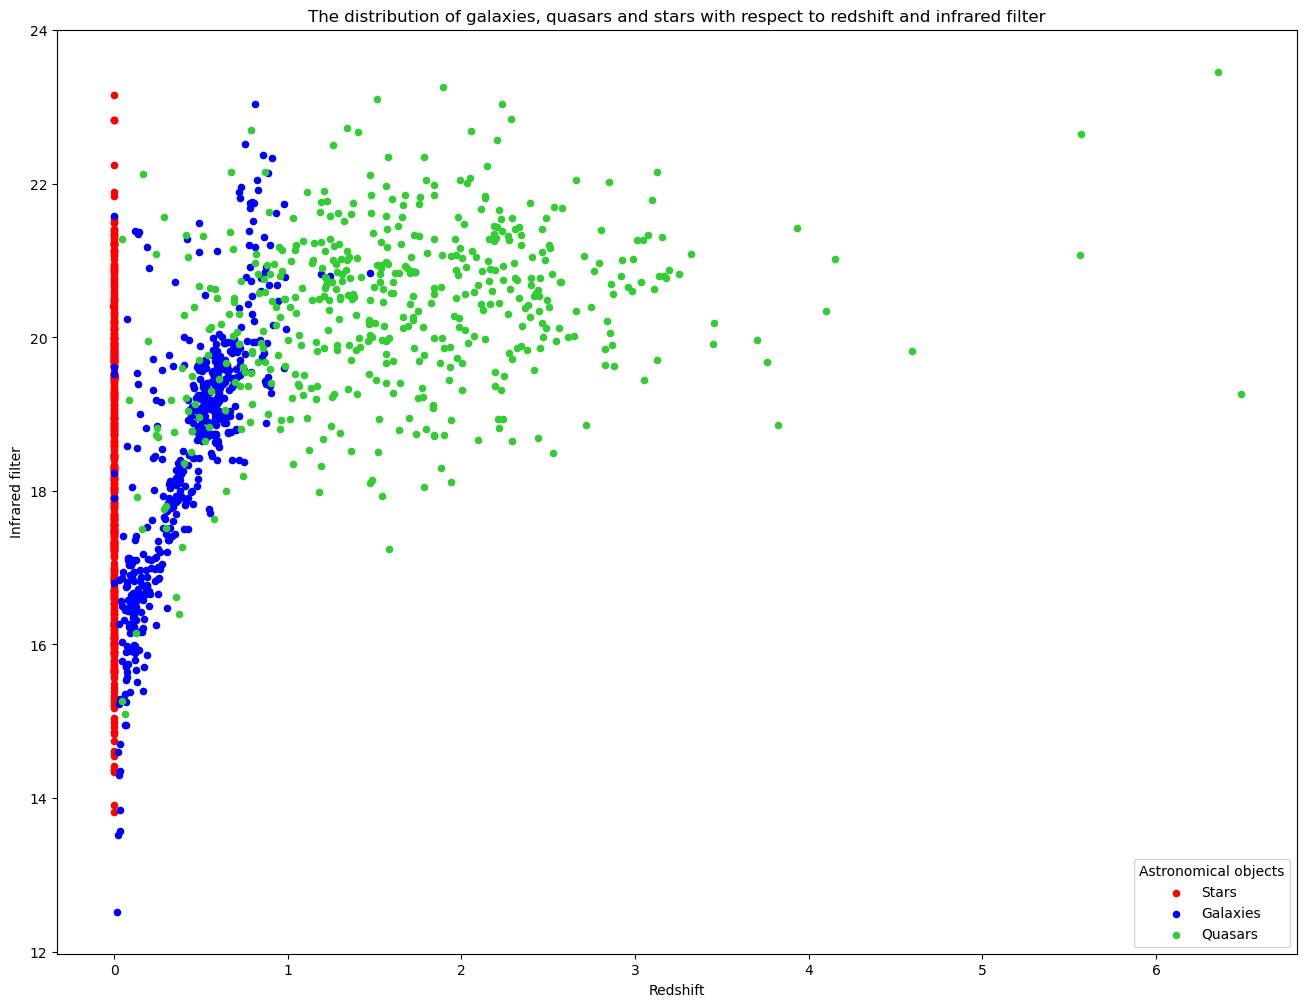

In [26]:
import matplotlib.pyplot as plt

# We plot only 500 samples to make the figure more clear.
ax1 = df_stars.sample(n = 500).plot(kind = "scatter", x = "redshift", y = "infrared", figsize = (16, 12), color = "red",
                        title = "The distribution of galaxies, quasars and stars with respect to redshift and infrared filter")

ax2 = df_galaxies.sample(n = 500).plot(kind = "scatter", x = "redshift", y = "infrared", color = "blue", ax = ax1)
ax3 = df_quasars.sample(n = 500).plot(kind = "scatter", x = "redshift", y = "infrared", color = "limegreen", ax = ax1)

ax1.set_xlabel("Redshift")
ax1.set_ylabel("Infrared filter")

plt.legend(["Stars", "Galaxies", "Quasars"], title = "Astronomical objects")


So let's then study if there is hope for classification based only on photometric measurements.
In the second figure we see that galaxies and quasars can be distringuished using infrared and ultraviolet filters.
Ultraviolet filter roughly means the "blueness" of an object and in galaxies it can be caused by a large population of young massive stars.
Here stars are on the other hand more scattered.

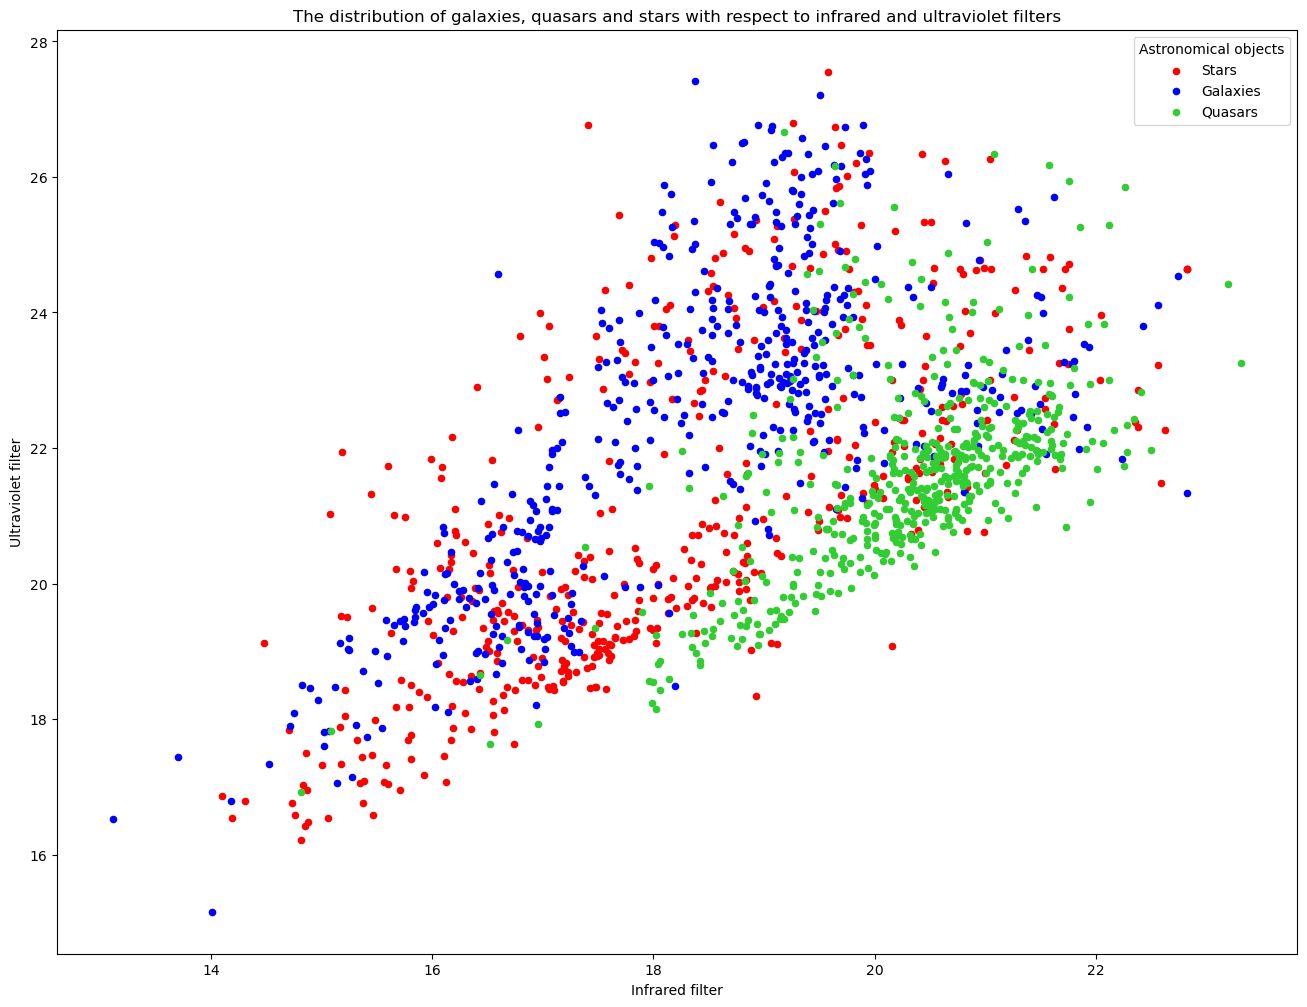

In [27]:
ax1 = df_stars.sample(n = 500).plot(kind = "scatter", x = "infrared", y = "ultraviolet", figsize = (16, 12), color = "red",
                        title = "The distribution of galaxies, quasars and stars with respect to infrared and ultraviolet filters")

ax2 = df_galaxies.sample(n = 500).plot(kind = "scatter", x = "infrared", y = "ultraviolet", color = "blue", ax = ax1)
ax3 = df_quasars.sample(n = 500).plot(kind = "scatter", x = "infrared", y = "ultraviolet", color = "limegreen", ax = ax1)

ax1.set_xlabel("Infrared filter")
ax1.set_ylabel("Ultraviolet filter")

plt.legend(["Stars", "Galaxies", "Quasars"], title = "Astronomical objects")


In the third figure we have values for the green and red filters. Here galaxies and quasars are apart from each other and
lot of stars fall in between them. Of course there is some overlapping with stars and quasars but stars are now more separated from galaxies (in the above figure stars were more mixed with galaxies). There is thus hope that photometric measurements could be used in the distinction of different classes.

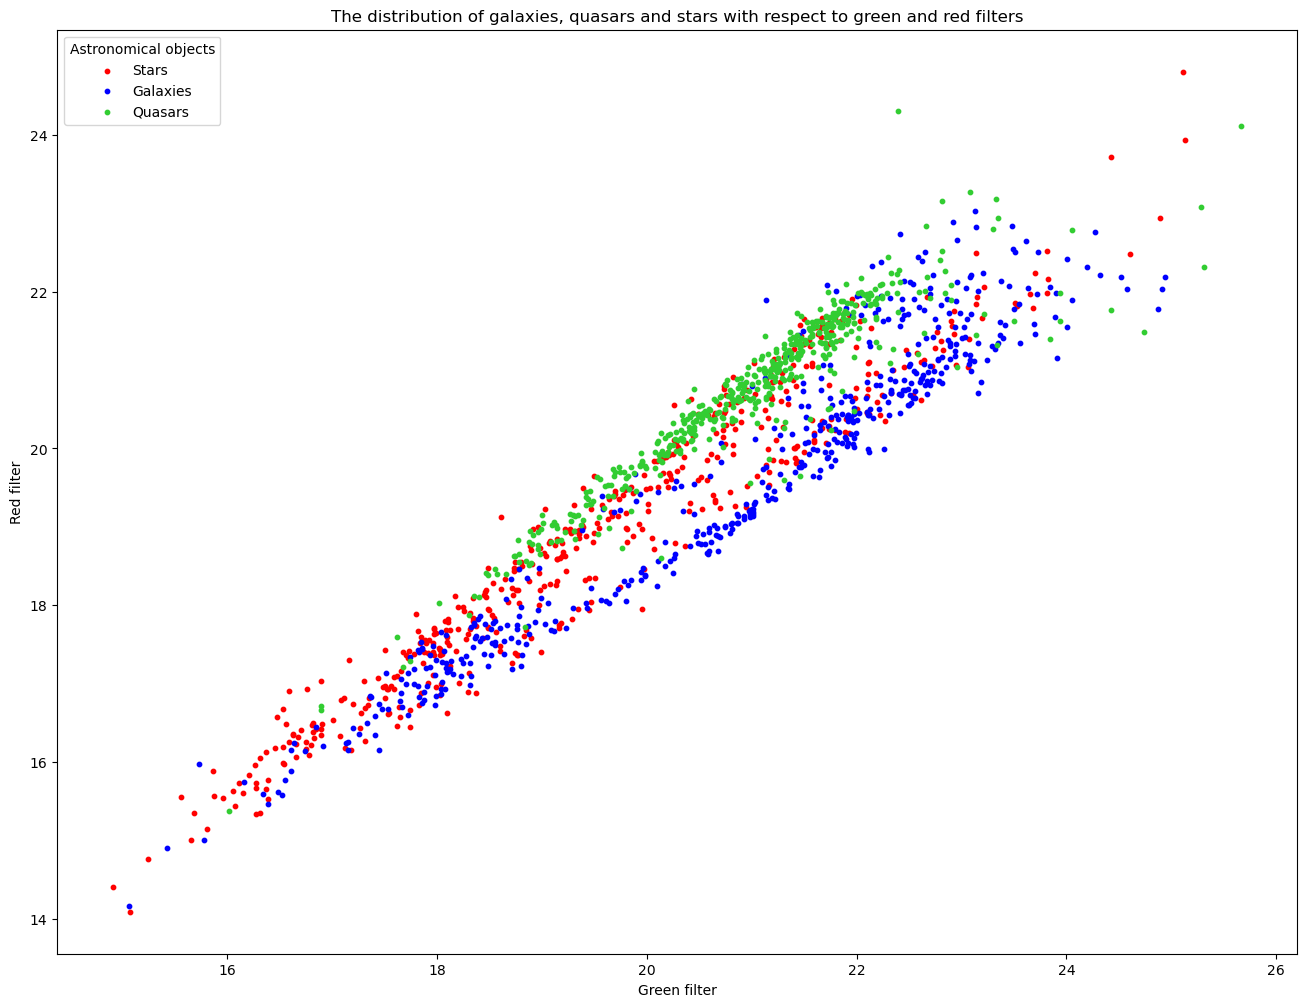

In [28]:
ax1 = df_stars.sample(n = 500).plot(kind = "scatter", x = "green", y = "red", figsize = (16, 12), color = "red",
                        title = "The distribution of galaxies, quasars and stars with respect to green and red filters", s=10)

ax2 = df_galaxies.sample(n = 500).plot(kind = "scatter", x = "green", y = "red", color = "blue", ax = ax1, s=10)
ax3 = df_quasars.sample(n = 500).plot(kind = "scatter", x = "green", y = "red", color = "limegreen", ax = ax1, s=10)

ax1.set_xlabel("Green filter")
ax1.set_ylabel("Red filter")

plt.legend(["Stars", "Galaxies", "Quasars"], title = "Astronomical objects")

In the next three figures we see how the astronomical objects are distributed in the sky. We can see that since these measurements
come from a survey the distributions are almost identical.
Notice that the ends of the x-axis must be glued together since we go around a full circle. Declination = 0 is the celestial equator.
The disk of our own galaxy (The Milky Way) causes the gaps in the pictures, i.e. there are very few visible galaxies in these areas.

<Axes: title={'center': 'The distribution of quasars in the sky SDSS DR17'}, xlabel='Right Ascension', ylabel='Declination'>

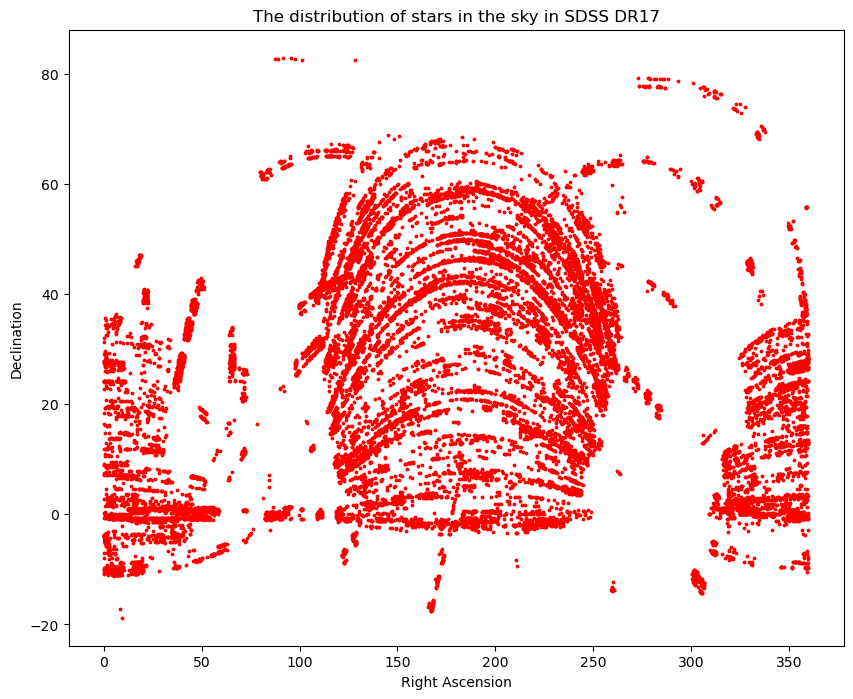

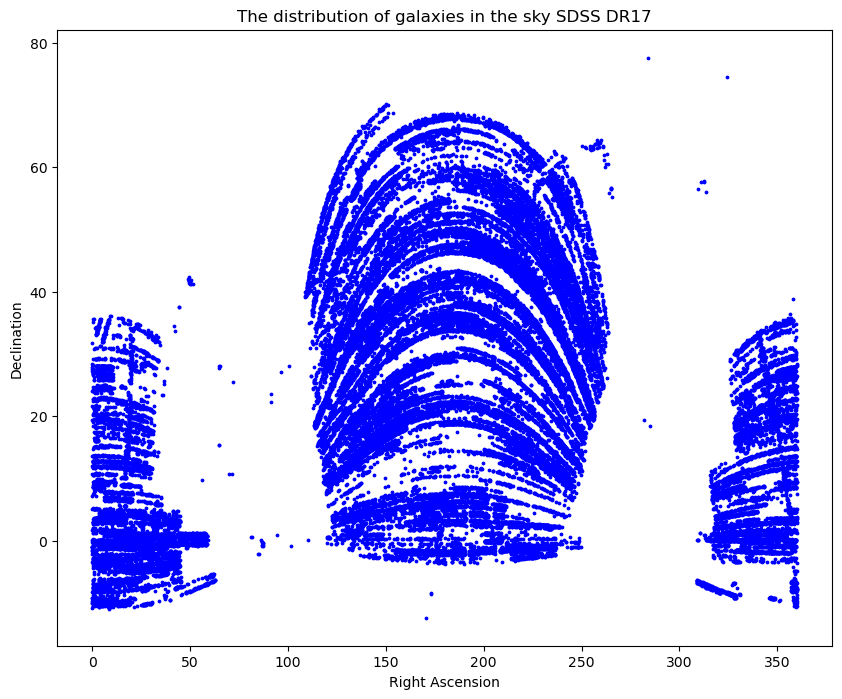

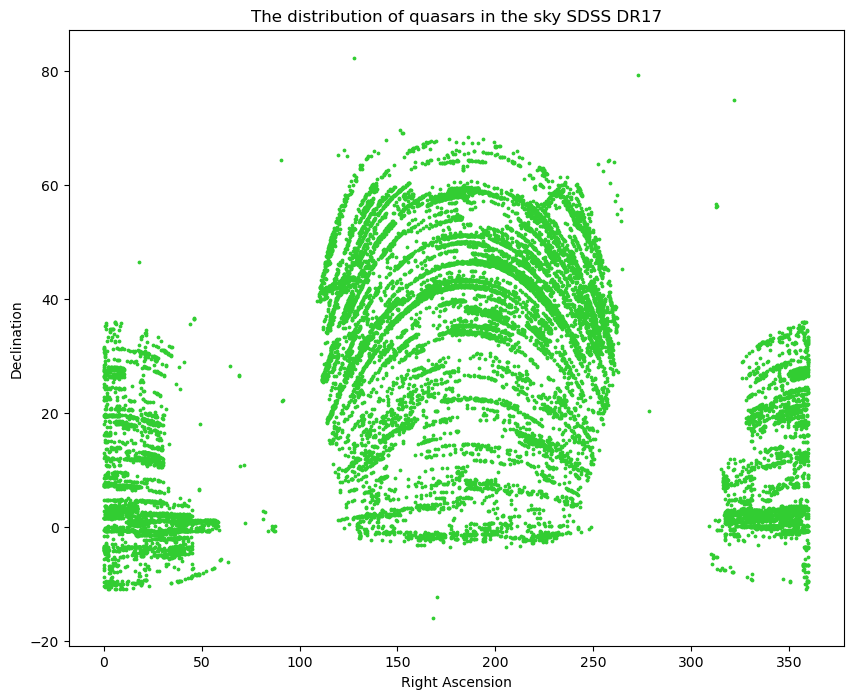

In [29]:
df_stars.plot(kind = "scatter", x = "right ascension", y = "declination", figsize = (10, 8), color = "red",
                        title = "The distribution of stars in the sky in SDSS DR17", s=3, xlabel = "Right Ascension", ylabel = "Declination")
df_galaxies.plot(kind = "scatter", x = "right ascension", y = "declination", figsize = (10, 8), color = "blue",
                        title = "The distribution of galaxies in the sky SDSS DR17", s=3, xlabel = "Right Ascension", ylabel = "Declination")
df_quasars.plot(kind = "scatter", x = "right ascension", y = "declination", figsize = (10, 8), color = "limegreen",
                        title = "The distribution of quasars in the sky SDSS DR17", s=3, xlabel = "Right Ascension", ylabel = "Declination")

## Implementation of deep learning

In [30]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# Split the data into training and test data: 70 % for training and 30 % for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1550) # random_state=1550

# Let's scale the data.
scaler_minmax = MinMaxScaler()
X_train = scaler_minmax.fit_transform(X_train)
X_test = scaler_minmax.transform(X_test)

scaler_stand = StandardScaler()
scaler_stand.fit(X_train)
X_train = scaler_stand.transform(X_train)
X_test = scaler_stand.transform(X_test)

print(f"Training data: {len(X_train)}, Test data : {len(X_test)}")

Training data: 70000, Test data : 30000


In [31]:
import tensorflow as tf

# The following neural network is found by trial and error. 
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(30, activation = "relu", input_shape=(5,)),
    tf.keras.layers.Dense(30, activation = "tanh"),
    tf.keras.layers.Dense(30, activation = "relu"),
    tf.keras.layers.Dense(30, activation = "relu"),
    tf.keras.layers.Dense(3, activation = "softmax") 
])

In [32]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy']
              )
model.fit(X_train, y_train, verbose=1, epochs=300, batch_size = 50)
results = model.evaluate(X_test, y_test, verbose = 1)


Epoch 1/300
1400/1400 [==============================] - 1s 515us/step - loss: 0.5864 - accuracy: 0.7751
Epoch 2/300
1400/1400 [==============================] - 1s 518us/step - loss: 0.4708 - accuracy: 0.8273
Epoch 3/300
1400/1400 [==============================] - 1s 519us/step - loss: 0.4274 - accuracy: 0.8449
Epoch 4/300
1400/1400 [==============================] - 1s 519us/step - loss: 0.4123 - accuracy: 0.8503
Epoch 5/300
1400/1400 [==============================] - 1s 530us/step - loss: 0.4037 - accuracy: 0.8534
Epoch 6/300
1400/1400 [==============================] - 1s 544us/step - loss: 0.3962 - accuracy: 0.8562
Epoch 7/300
1400/1400 [==============================] - 1s 519us/step - loss: 0.3895 - accuracy: 0.8583
Epoch 8/300
1400/1400 [==============================] - 1s 532us/step - loss: 0.3845 - accuracy: 0.8598
Epoch 9/300
1400/1400 [==============================] - 1s 529us/step - loss: 0.3809 - accuracy: 0.8619
Epoch 10/300
1400/1400 [==============================]

In [33]:
# Let's print a summary of the model and also its loss and accuracy after training.
model.summary()
print(f'Loss: {results[0]} and accuracy: {results[1]}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                180       
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 30)                930       
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 dense_9 (Dense)             (None, 3)                 93        
                                                                 
Total params: 3,063
Trainable params: 3,063
Non-trainable params: 0
_________________________________________________________________
Loss: 0.3287504017353058 and accuracy: 0.88426667451

938/938 [==============================] - 0s 233us/step
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     17972
           1       0.81      0.82      0.81      5581
           2       0.84      0.77      0.80      6447

    accuracy                           0.88     30000
   macro avg       0.86      0.85      0.85     30000
weighted avg       0.88      0.88      0.88     30000



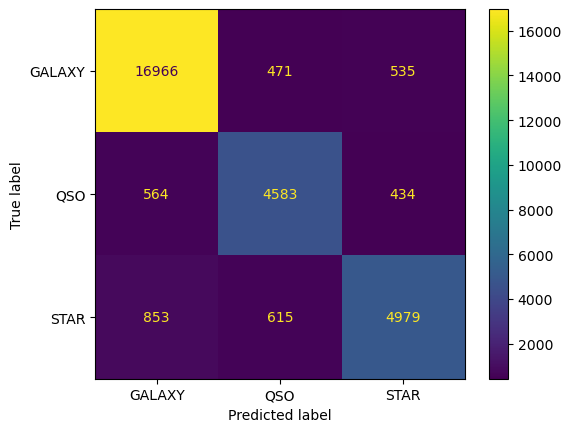

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = np.argmax(model.predict(X_test),  axis = 1) # Get the highest probability class

cr = classification_report(y_test, y_pred)
print(cr)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= label_encoder.inverse_transform([0, 1, 2])).plot()
plt.show() 

Let's see if the accuracy increases when we only include galaxies and quasars in the data. In other words, let us assume that
we know that the object is a galaxy but we want to determine whether it is an active galaxy or not (has active nucleus).

In [35]:
df2 = df[(df["class"] == "GALAXY") | (df["class"] == "QSO")]
X_binary = df2.drop(["class", "redshift", "right ascension", "declination"], axis = 1)
y_binary = label_encoder.fit_transform(df2['class']) 

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.3, random_state=1550)

X_train_binary = scaler_minmax.fit_transform(X_train_binary)
X_test_binary = scaler_minmax.transform(X_test_binary)

scaler_stand.fit(X_train_binary)
X_train_binary = scaler_stand.transform(X_train_binary)
X_test_binary = scaler_stand.transform(X_test_binary)

# We need to modify our previous model a little bit. The output layer has only two classes now
model_binary = tf.keras.Sequential([ 
    tf.keras.layers.Dense(30, activation = "relu", input_shape=(5,)),
    tf.keras.layers.Dense(30, activation = "tanh"),
    tf.keras.layers.Dense(30, activation = "relu"),
    tf.keras.layers.Dense(30, activation = "relu"),
    tf.keras.layers.Dense(2, activation = "softmax") 
])


model_binary.compile(loss='sparse_categorical_crossentropy',
              optimizer= "adam", 
              metrics=['accuracy']
                    )


model_binary.fit(X_train_binary, y_train_binary, verbose=1, epochs=300, batch_size = 50)
results_binary = model_binary.evaluate(X_test_binary, y_test_binary, verbose = 1)
   

Epoch 1/300
1098/1098 [==============================] - 1s 518us/step - loss: 0.2105 - accuracy: 0.9251
Epoch 2/300
1098/1098 [==============================] - 1s 517us/step - loss: 0.1779 - accuracy: 0.9393
Epoch 3/300
1098/1098 [==============================] - 1s 515us/step - loss: 0.1719 - accuracy: 0.9421
Epoch 4/300
1098/1098 [==============================] - 1s 514us/step - loss: 0.1695 - accuracy: 0.9423
Epoch 5/300
1098/1098 [==============================] - 1s 513us/step - loss: 0.1670 - accuracy: 0.9432
Epoch 6/300
1098/1098 [==============================] - 1s 510us/step - loss: 0.1660 - accuracy: 0.9428
Epoch 7/300
1098/1098 [==============================] - 1s 515us/step - loss: 0.1640 - accuracy: 0.9442
Epoch 8/300
1098/1098 [==============================] - 1s 510us/step - loss: 0.1636 - accuracy: 0.9444
Epoch 9/300
1098/1098 [==============================] - 1s 513us/step - loss: 0.1622 - accuracy: 0.9444
Epoch 10/300
1098/1098 [==============================]

In [36]:
# Let's print a summary of the model and also its loss and accuracy after training.
model_binary.summary()
print(f'Loss: {results_binary[0]} and accuracy: {results_binary[1]}')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                180       
                                                                 
 dense_11 (Dense)            (None, 30)                930       
                                                                 
 dense_12 (Dense)            (None, 30)                930       
                                                                 
 dense_13 (Dense)            (None, 30)                930       
                                                                 
 dense_14 (Dense)            (None, 2)                 62        
                                                                 
Total params: 3,032
Trainable params: 3,032
Non-trainable params: 0
_________________________________________________________________
Loss: 0.16183479130268097 and accuracy: 0.9484312534

736/736 [==============================] - 0s 228us/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17883
           1       0.90      0.89      0.89      5639

    accuracy                           0.95     23522
   macro avg       0.93      0.93      0.93     23522
weighted avg       0.95      0.95      0.95     23522



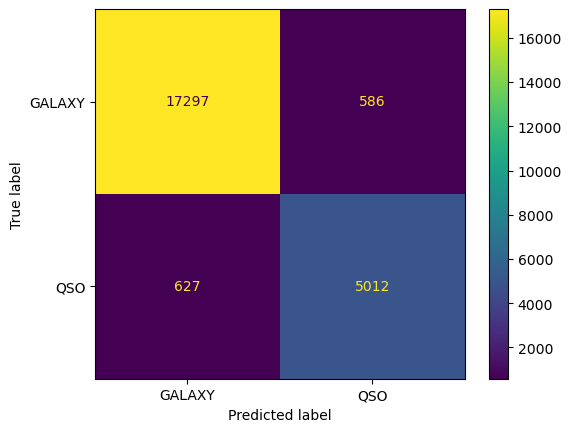

In [37]:
y_pred_binary = np.argmax(model_binary.predict(X_test_binary),  axis = 1) # Get the highest probability class

cr_binary = classification_report(y_test_binary, y_pred_binary)
print(cr_binary)

cm_binary = confusion_matrix(y_test_binary, y_pred_binary)

ConfusionMatrixDisplay(confusion_matrix=cm_binary, display_labels= label_encoder.inverse_transform([0, 1])).plot()
plt.show() 


We see now that the accuracy is much better than in the model including data of stars. Let's then plot the ROC-curve for the binary classification and calculate the AUC value.

736/736 [==============================] - 0s 209us/step


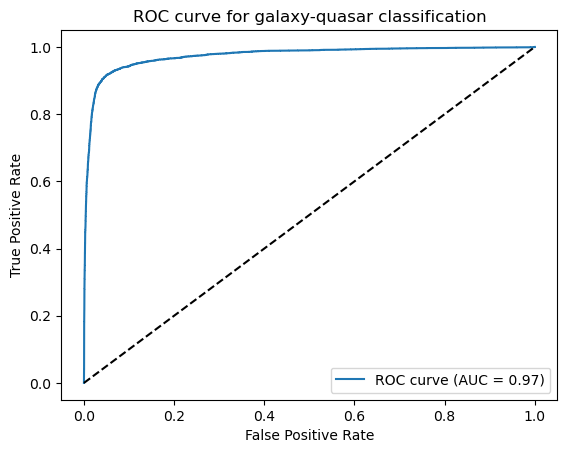

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_pred_proba_binary = model_binary.predict(X_test_binary)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba_binary)

auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title("ROC curve for galaxy-quasar classification")
plt.show()


Let's then try to predict the redshift of a galaxy or quasar from the photometric measurements using a regression model.
So we exclude stars also in this model.

In [39]:
y_reg = df2["redshift"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_binary, y_reg, test_size=0.3, random_state=1550)

X_train_reg = scaler_minmax.fit_transform(X_train_reg)
X_test_reg = scaler_minmax.transform(X_test_reg)

scaler_stand.fit(X_train_reg)
X_train_reg = scaler_stand.transform(X_train_reg)
X_test_reg = scaler_stand.transform(X_test_reg)

# For regression we have single output with linear activation. The neural network is modified a little bit to get better results.
# The following neural network is found by trial and error.
model_reg = tf.keras.Sequential([ 
    tf.keras.layers.Dense(30, activation = "relu", input_shape=(5,)),
    tf.keras.layers.Dense(30, activation = "tanh"),
    tf.keras.layers.Dense(30, activation = "relu"),
    tf.keras.layers.Dense(30, activation = "relu"), 
    tf.keras.layers.Dense(30, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "linear") 
])

# Mean absolute error gives better results as a loss function.
model_reg.compile(loss='mae',
              optimizer= "adam", 
              metrics=['mae']
                    )

model_reg.fit(X_train_reg, y_train_reg, verbose=1, epochs=300, batch_size = 50)
results_reg = model_reg.evaluate(X_test_reg, y_test_reg, verbose = 1)

Epoch 1/300
1098/1098 [==============================] - 1s 545us/step - loss: 0.2435 - mae: 0.2435
Epoch 2/300
1098/1098 [==============================] - 1s 548us/step - loss: 0.2143 - mae: 0.2143
Epoch 3/300
1098/1098 [==============================] - 1s 542us/step - loss: 0.2074 - mae: 0.2074
Epoch 4/300
1098/1098 [==============================] - 1s 540us/step - loss: 0.2011 - mae: 0.2011
Epoch 5/300
1098/1098 [==============================] - 1s 539us/step - loss: 0.1953 - mae: 0.1953
Epoch 6/300
1098/1098 [==============================] - 1s 543us/step - loss: 0.1924 - mae: 0.1924
Epoch 7/300
1098/1098 [==============================] - 1s 542us/step - loss: 0.1889 - mae: 0.1889
Epoch 8/300
1098/1098 [==============================] - 1s 542us/step - loss: 0.1864 - mae: 0.1864
Epoch 9/300
1098/1098 [==============================] - 1s 541us/step - loss: 0.1844 - mae: 0.1844
Epoch 10/300
1098/1098 [==============================] - 1s 539us/step - loss: 0.1837 - mae: 0.1837

In [40]:
model_reg.summary()
print(f'Loss: {results_reg[0]} and mean absolute error: {results_reg[1]}')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 30)                180       
                                                                 
 dense_16 (Dense)            (None, 30)                930       
                                                                 
 dense_17 (Dense)            (None, 30)                930       
                                                                 
 dense_18 (Dense)            (None, 30)                930       
                                                                 
 dense_19 (Dense)            (None, 30)                930       
                                                                 
 dense_20 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3,931
Trainable params: 3,931
Non-traina

Finally, let's demonstrate using a random forest classifier that the redshift indeed is the most important feature and the spherical coordinates are the most irrelevant
features in the data. In fact, we can reach almost 98 % accuracy with the random forest when redshift is included in the features/measurements.
Similar high accuracy is obtained also when we use neural networks. This is one reason why I dropped redshift from the features since it leads to too precise predictions (redshift is "too much" information).

In [42]:
from sklearn.ensemble import RandomForestClassifier

X_redshift = df.drop(["class"], axis = 1)

X_train_redshift, X_test_redshift, y_train_redshift, y_test_redshift = train_test_split(X_redshift, y, test_size=0.3, random_state=1550)

X_train_redshift = scaler_minmax.fit_transform(X_train_redshift)
X_test_redshift = scaler_minmax.transform(X_test_redshift)

scaler_stand.fit(X_train_redshift)
X_train_redshift = scaler_stand.transform(X_train_redshift)
X_test_redshift = scaler_stand.transform(X_test_redshift)

model_RF = RandomForestClassifier(n_estimators=70, random_state=2100, max_depth = 20)
model_RF.fit(X_train_redshift, y_train_redshift)

feature_importances = model_RF.feature_importances_
for i in range(len(feature_importances)):
    print("feature: %12s - relative importance: %4.1f %%" % (X_redshift.columns[i], feature_importances[i] * 100))

accuracy = model_RF.score(X_test_redshift, y_test_redshift)
print(f'Accuracy of Random Forest Classifier: {round(accuracy*100, 1)} %.')


feature: right ascension - relative importance:  1.4 %
feature:  declination - relative importance:  1.4 %
feature:  ultraviolet - relative importance:  6.7 %
feature:        green - relative importance:  7.2 %
feature:          red - relative importance:  4.1 %
feature: near infrared - relative importance:  7.3 %
feature:     infrared - relative importance:  8.6 %
feature:     redshift - relative importance: 63.3 %
Accuracy of Random Forest Classifier: 97.7 %.


## Analysis of the results

Learning results of the three models we used were quite good. First I tried training the networks without the StandardScaler. For the three class classification problem (galaxy, star or quasar) we obtained accuracy of roughly 80 %. For some runs the accuracy was little below 80 % and for some runs it was little above 80 %. For the binary classification problem (galaxy or quasar) the accuracy was very high, almost 94 %. These accuracies are very good since we use only photometric measurements (filters) in the classification. Telescope time is usually limited and redshift is much more difficult to measure than brightness through filters so these photometric classification results were promising. In fact, the predictions were surprisingly accurate since the random forest classifier tells us that redshift has 63 % relative importance in all features.
  
Without the StandardScaler the AUC value of the binary classification was excellent 0.97 so the classifier performed very well. From the confusion matrix of the three class classification problem we saw that galaxies and quasars were often misclassified as stars (around 3000 wrong predictions total). The neural network had the highest accuracy 88 % in classifying galaxies and lowest accuracy 63 % in classifying quasars (for stars it was 73 %). This could be due to the fact that in the data there are three times more galaxies than other two objects (21594 stars, 18961 quasars and 59445 galaxies). Also physical properties of stars vary a lot and galaxies and quasars consist of billions of stars and can have similar photometric properties even though quasars have an active nucleus. For the binary classification the wrong predictions were quite symmetric, even though active galaxies (QSOs) were misclassified as normal galaxies twice as often than normal galaxies were misclassified as active galaxies. Accuracy for galaxy prediction was excellent 97 % and for quasar prediction very good 85 % in the binary classification. Here we can see that it was more difficult for the neural network to classify quasars correctly in both classification problems.

In the regression problem we tried to predict the redshift of a galaxy or a quasar from photometric measurements (see https://en.wikipedia.org/wiki/Photometric_redshift). The neural network performed well without the StandardScaler even though the mean absolute error was quite high 0.2. The error varied within different runs and usually was between 0.19 - 0.25. However, this method gives at least some estimate for the redshifts of galaxies when only photometric data is available. The error was also much less than mentioned in the wikipedia article (delta z = 0.5). Using redshift we can then estimate the distance to the galaxy using some cosmological model. For high redshifts the error in the distance estimate is small but for small redshifts the error can cause significant uncertainty in the distance.

Then we included the StandardScaler to the train and test data. The results improved in both classification problems and also in the regression problem. In the three class classification problem the accuracy increased from 79-80 % to almost 89 % which is a remarkable improvement. The prediction accuracies for galaxies, quasars and stars are 92 %, 81 % and 84 % respectively. This is very good even though quasars still have the lowest accuracy in predictions. The confusion matrix is now more symmetric with respect to wrong predictions even though galaxies and quasars are still often misclassified as stars (around 1500 wrong predictions). The accuracy of the binary classification did not increase as dramatically, only from 94 % to 95 %, and the AUC value remained the same 0.97. Accuracy in the galaxy prediction remained the same 97 % but the accuracy in quasar prediction increased to 90 %. The confusion matrix is now almost symmetric with respect to wrong predictions. The mean absolute error of the regression problem dropped from 0.2 to 0.17 which is rather good when we compare it to the error 0.5 in the wikipedia article. 

When we increase the amount of epochs in training the accuracy of the binary classification does not improve at all in the test data. On the other hand, the three class classification and regression problems do improve but very slightly and slowly. So I believe that it is unnecessary to run more than 300 epochs since the run time increases a lot but no significant progress is gained. However, it would be interesting to see how low we can get the mean absolute error in the regression problem since redshift gives an estimate for the distance to the galaxy. I also believe that 90 % accuracy is possible to achieve in the first classification problem with longer runs (and with better neural networks).

----------------------------------------------------------------------------------------------------------------------------------------

The deep learning went well for the selected data and selected deep learning methods. The neural networks had to be built by hand using trial and error trying to maximize the accuracy in multiple different runs on the data. Building the optimal networks took a lot of time and experiments (and I think these are not the best neural networks for these tasks) since I wanted to reach at least 80 % accuracy in the classification problems. In the regression problem I wanted to have at least smaller error than what is mentioned in the photometric redshift wikipedia article. It seems that it is not so simple to predict the redshift from the photometric measurements and the error always remains rather high (at least using these types of neural networks). But overall the classification methods went very well (surprisingly well) and the regression method went better than expected (in the beginning the mean absolute error was stuck around 0.4 but I managed to improve it to 0.17). Applying the StandardScaler to the data improved the results a lot and I almost forgot that such a thing exists when I was working on this project. Now our networks separate stars from galaxies and quasars with good accuracy and also provide rather good predictions for the redshifts of galaxies and quasars, all based only on photometric measurements of the astronomical objects.

----------------------------------------------------------------------------------------------------------------------------------------

There are some things which could be improved and developed in this project. First of all, the data is pretty unbalanced since it contains so many galaxies compared to quasars and stars. Having balanced data could improve the accuracy and make the neural network classifier more reliable. One option would be to take equal amount of objects to the train and test data (let's say 20 000 of each objects) or somehow generate artificial data so that there would be equal amount of different types of objects. One could also try to increase the amount of data in training since SDSS alone has taken photometric measurements of nearly 1 billion astronomical objects. However, I was not able to find SDSS data outside Kaggle to use in this project. 

Secondly, part of the training data could be used as validation data which I didn't use in this project. Validation data could help to tune the hyperparameters of the model and it would make it easier to find an optimal neural network for the classification tasks. I just used random guesses for the hyperparameters and network structure and ran the different models with the same huge data multiple times which took a lot of time. I could have tried different types of neural networks since now my networks are quite simple. Especially the number of neurons is low and the networks are not so deep compared to that large amount of data which is available for training. 

Regularization is one thing which could improve the accuracy in test data in the classification and regression problems. Now the accuracy is lower in the test data than it is in the training data. I tried droupout layers and L2-regularization in my small networks but the accuracy in the test data was the same or even worse. Maybe regularization would work for larger and deeper networks with more data? Of course the computation time would have increased a lot for deeper networks and for the current setup it took about 5 - 10 minutes to run the entire code just to see how small changes in the parameters affected the outcome. 

Also one thing which could improve the predictions is the removal of outliers from the dataset. My dataset was so huge that it was not quite possible to find outliers visually from graphs so different methods need to be used for that. Also in astronomy we can not always tell if some object is an outlier. The data is skewed since we can only observe very bright objects from great distances and dim objects only when they are close to us. Most of the dim objects are left unnoticed and the dataset is always biased in this sense (we simply can not observe everything that could be observed since our telescopes have limited capability to see distant astronomical objects). One could consider stars as outliers compared to galaxies and quasars in this dataset since stars have very low redshifts (look at for example the redshift - infrared figure). This is one reason why I dropped the class "STAR" in the second binary classification task. However, we noticed that mean absolute error gave a better accuracy (also measured as mean absolute error) than mean squared error as a loss function in the regression problem. This indicates that there are still outliers in the data containing only galaxies and quasars. Maybe I should have included a redshift threshold and remove galaxies with low redshifts from the data.

Feature engineering is in huge role when doing AI and ML projects. Now I used just raw data since I am not an expert in this field (astronomy). But I believe that combining different filter datas (e.g. adding them or subtracting them from each other) would reveal more patterns and lead to better distinction between the different classes. For example, would the distinction between galaxies and quasars be clearer if we defined new features using subtraction like ultraviolet - green and green - red? Dimensional reduction with PCA could also be used to extract new features from the existing ones and see if it leads to better classification and regression (now we have three different reds in the filter system plus green and ultraviolet).